In [1]:
import tensorflow as tf

In [2]:
a = tf.constant(5)
print(a)
# This creates an object tensor which is a constant number of data type int32

tf.Tensor(5, shape=(), dtype=int32)


In [3]:
b = tf.constant(15)
c = tf.add(a, b)
print(c)

tf.Tensor(20, shape=(), dtype=int32)


In [4]:
var1 = tf.Variable(10)
print(var1)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>


In [5]:
var2 = tf.Variable([[1, 2], [3, 4]])
var3 = tf.Variable([[5, 6], [7, 8]])
print(tf.matmul(var2, var3))

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
print(y_train.shape)

(60000,)


In [9]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


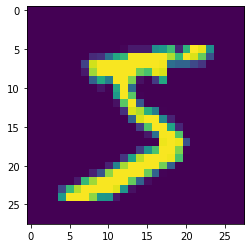

5


In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [11]:
x_train = x_train.reshape(x_train.shape[0], 784)/255.0 # 28*28 = 784
# we divided by 255 because the datain every cell is between 0 to 255, so we had to normalise it
x_train.shape

(60000, 784)

In [12]:
# similarly
x_test = x_test.reshape(x_test.shape[0], 784)/255.0
x_test.shape

(10000, 784)

In [13]:
# now we have to one hot encode the output labels since the output is between 0 to 9
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [14]:
# importing sequential API
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (784,)))
model.add(Dense(256, activation = 'relu'))
# 2 layered Neural Network
model.add(Dense(10, activation = 'softmax'))
# output layer above

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60/60 [==============================] - 2s 29ms/step - loss: 0.5604 - accuracy: 0.8492
Epoch 2/10
60/60 [==============================] - 2s 29ms/step - loss: 0.1999 - accuracy: 0.9421
Epoch 3/10
60/60 [==============================] - 2s 29ms/step - loss: 0.1436 - accuracy: 0.9584
Epoch 4/10
60/60 [==============================] - 2s 31ms/step - loss: 0.1110 - accuracy: 0.9680
Epoch 5/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0868 - accuracy: 0.9749
Epoch 6/10
60/60 [==============================] - 3s 52ms/step - loss: 0.0706 - accuracy: 0.9797
Epoch 7/10
60/60 [==============================] - 4s 59ms/step - loss: 0.0591 - accuracy: 0.9830
Epoch 8/10
60/60 [==============================] - 3s 58ms/step - loss: 0.0500 - accuracy: 0.9863
Epoch 9/10
60/60 [==============================] - 3s 58ms/step - loss: 0.0409 - accuracy: 0.9888
Epoch 10/10
60/60 [==============================] - 3s 52ms/step - loss: 0.0355 - accuracy: 0.9902


In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9770


[0.07640822231769562, 0.9769999980926514]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


Now let's check Functional Neural Network, which acts as a graph

In [20]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

In [21]:
input = Input(shape = [784,])
hidden_layer_1 = Dense(256, activation = 'relu')(input) # passing the input
hidden_layer_2 = Dense(256, activation = 'relu')(hidden_layer_1)
hidden_layer_3 = Dense(256, activation = 'relu')(input)
concat_layer = Concatenate()([hidden_layer_2, hidden_layer_3])
output_layer = Dense(10, activation = 'softmax')(concat_layer)

model = Model(inputs = [input], outputs = [output_layer])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 256)          65792       ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                              

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60/60 [==============================] - 3s 44ms/step - loss: 0.5082 - accuracy: 0.8659
Epoch 2/10
60/60 [==============================] - 3s 53ms/step - loss: 0.1868 - accuracy: 0.9459
Epoch 3/10
60/60 [==============================] - 3s 44ms/step - loss: 0.1290 - accuracy: 0.9632
Epoch 4/10
60/60 [==============================] - 3s 44ms/step - loss: 0.0970 - accuracy: 0.9718
Epoch 5/10
60/60 [==============================] - 3s 44ms/step - loss: 0.0741 - accuracy: 0.9782
Epoch 6/10
60/60 [==============================] - 3s 44ms/step - loss: 0.0604 - accuracy: 0.9825
Epoch 7/10
60/60 [==============================] - 3s 45ms/step - loss: 0.0479 - accuracy: 0.9862
Epoch 8/10
60/60 [==============================] - 3s 45ms/step - loss: 0.0384 - accuracy: 0.9889
Epoch 9/10
60/60 [==============================] - 3s 44ms/step - loss: 0.0320 - accuracy: 0.9912
Epoch 10/10
60/60 [==============================] - 3s 44ms/step - loss: 0.0269 - accuracy: 0.9930


In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9786


[0.0661235973238945, 0.978600025177002]

In [24]:
from tensorflow.keras import layers

In [25]:
class MyLayer(layers.Layer) : # inheriting from class layers.Layer

  def __init__(self, units, input_dim, activation) : # constructor function with layer params
    super(MyLayer, self).__init__()
    w_init = tf.random_normal_initializer() # initialising weights
    b_init = tf.random_normal_initializer() # initialising biases
    # trainable params can be stored in variable, thus...
    self.w = tf.Variable(initial_value = w_init(shape = (input_dim, units), dtype = 'float32'), trainable = True)
    self.b = tf.Variable(initial_value = b_init(shape = (units,), dtype = 'float32'), trainable = True)
    self.activation = activation # assigning the activation function

  def call(self, inputs) : # forward propagation
    linear_op = tf.add(tf.matmul(inputs, self.w), self.b)
    if self.activation == 'relu' :
      return tf.nn.relu(linear_op)
    elif self.activation == 'softmax' :
      return tf.nn.softmax(linear_op)

In [26]:
class MyModel(tf.keras.Model) : # MyModel is a subclass of tf.keras.Model

  def __init__(self, n_input, n_hidden_1, n_hidden_2, n_classes) :
    super(MyModel, self).__init__()
    self.layer1 = MyLayer(n_hidden_1, n_input, 'relu') # 1st hidden layer
    self.layer2 = MyLayer(n_hidden_2, n_hidden_1, 'relu') # 2nd hidden layer
    self.out_layer = MyLayer(n_classes, n_hidden_2, 'softmax') # output layer

  def call(self, inputs) :
      output_from_layer_1 = self.layer1(inputs)
      output_from_layer_2 = self.layer2(output_from_layer_1)
      return self.out_layer(output_from_layer_2) # output layer

In [27]:
model = MyModel(784, 256, 256, 10) # model created

In [28]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
model.fit(x_train, y_train, epochs = 20, batch_size = 500)

Epoch 1/20
120/120 [==============================] - 3s 27ms/step - loss: 0.0193 - accuracy: 0.9948
Epoch 2/20
120/120 [==============================] - 3s 22ms/step - loss: 0.0165 - accuracy: 0.9956
Epoch 3/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0133 - accuracy: 0.9966
Epoch 4/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0111 - accuracy: 0.9973
Epoch 5/20
120/120 [==============================] - 2s 17ms/step - loss: 0.0088 - accuracy: 0.9979
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 7/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0060 - accuracy: 0.9987
Epoch 8/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 9/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 10/20
120/120 [==============================] - 2s 16ms/step - loss: 0.0028 - accura

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9818


[0.08399809151887894, 0.9818000197410583]